<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnarDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral10
import altair as alt

warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = "{:,.2f}".format

In [3]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

FILE_PATH = './the_movies_dataset'

df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00


In [5]:
df.shape

(45466, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
df = df.drop(['belongs_to_collection'], axis=1)
df = df.drop(['homepage'], axis=1)
df = df.drop(['video'], axis=1)
df = df.drop(['poster_path'], axis=1)
df = df.drop(['production_companies'], axis=1)
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['adult'], axis=1)

df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

df['weekday'] = df['release_date'].dt.day_name()

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)

In [7]:
df.isnull().mean() * 100

,0
budget,80.45
genres,0.00
id,0.00
original_language,0.02
original_title,0.00
overview,2.10
popularity,0.01
production_countries,0.01
release_date,0.20
revenue,0.01


In [8]:
df['genres'] = df['genres'].fillna(df['genres'].mode()[0])
df['original_language'] = df['original_language'].fillna(df['original_language'].mode()[0])
df['weekday'] = df['weekday'].fillna(df['weekday'].mode()[0])

df = df.dropna(subset=['overview'])
df = df.dropna(subset=['revenue'])

df['release_date'] = df['release_date'].fillna(df['release_date'].mean())
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

df['budget'] = df['budget'].fillna(df['budget'].mean())

In [9]:
df.isnull().mean() * 100

,0
budget,0.00
genres,0.00
id,0.00
original_language,0.00
original_title,0.00
overview,0.00
popularity,0.00
production_countries,0.00
release_date,0.00
revenue,0.00


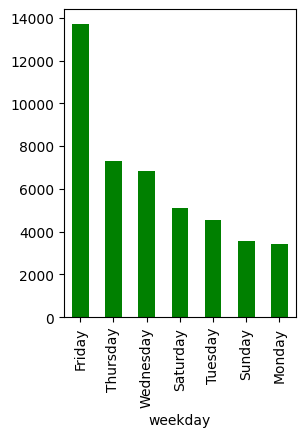

In [10]:
# Гипотеза про пятницу
df['weekday'].value_counts().plot(kind='bar', figsize=(3, 4), color='green')
plt.title="Выпуск фильмов по дням недели"
plt.xlabel="Дни недели"
plt.ylabel="Количество релизов"
plt.show()

In [11]:
# Гипотеза про актеров 1
df2 = pd.read_csv(f'{FILE_PATH}/credits.csv')
df2.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [12]:
df2.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [13]:
df2.shape

(45476, 3)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [15]:
def convert_int(x):
  try:
    return int(x)
  except:
    return np.nan

df['id'] = df['id'].apply(convert_int)
df = df.drop(df[df['id'].isnull()].index)
df['id'] = df['id'].astype('int')

In [16]:
df_merge = df.merge(df2, on='id')
df_merge.shape
df_merge['cast'] = df_merge['cast'].apply(ast.literal_eval)

In [17]:
def get_name(x):
    for i in x:
        if i['order'] == 0:
            return i['name']
    return np.nan

df_merge['actor_name'] = df_merge['cast'].apply(get_name)

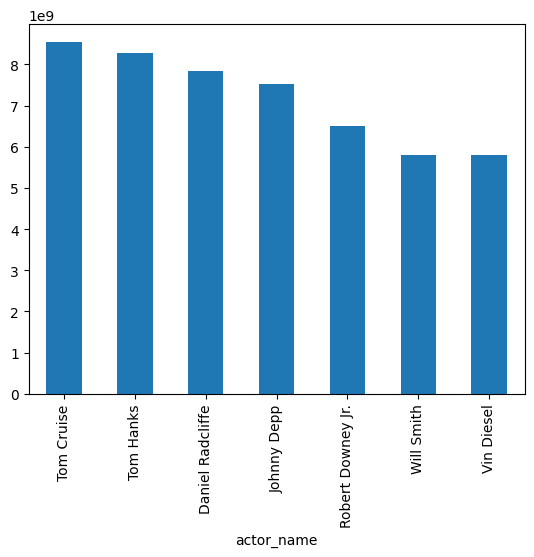

In [18]:
df_merge = df_merge[['actor_name', 'revenue', 'budget']]
df_merge.groupby('actor_name').sum().sort_values('revenue', ascending=False)['revenue'].head(7).plot(kind='bar')
plt.show()

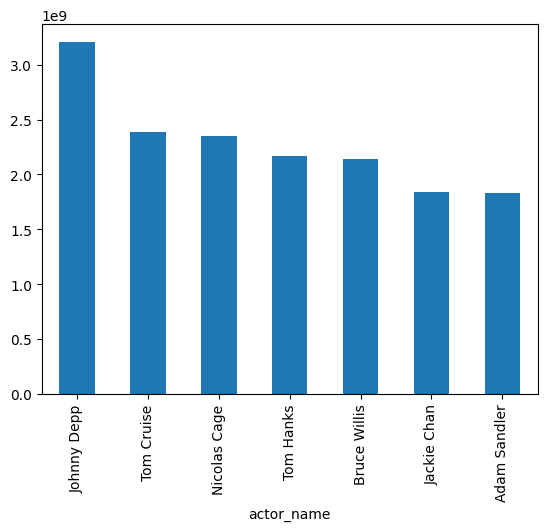

In [19]:
# Гипотеза про актеров 2
df_merge = df_merge[['actor_name', 'revenue', 'budget']]
df_merge.groupby('actor_name').sum().sort_values('budget', ascending=False)['budget'].head(7).plot(kind='bar')
plt.show()